In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [7]:
df_index = pd.read_csv('economic_index.csv')

In [8]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)


In [10]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

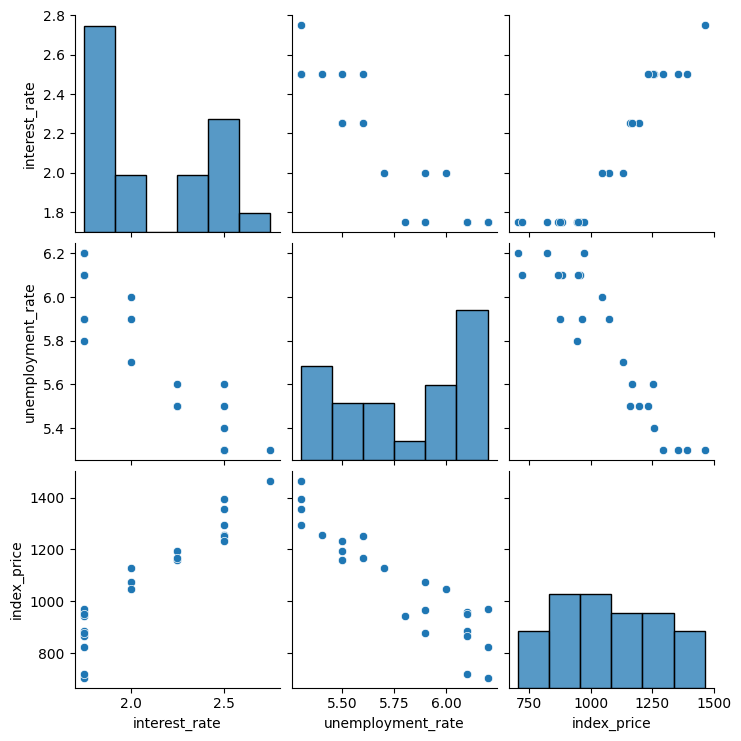

In [12]:
import seaborn as sns
sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


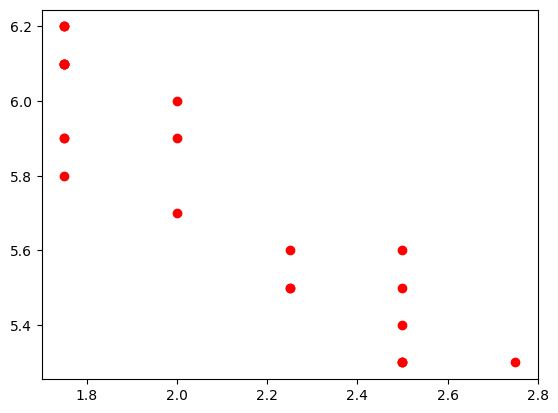

In [14]:
## visualize datapoints
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='red')


In [15]:
#independent feature dependent feature
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [16]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)    

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

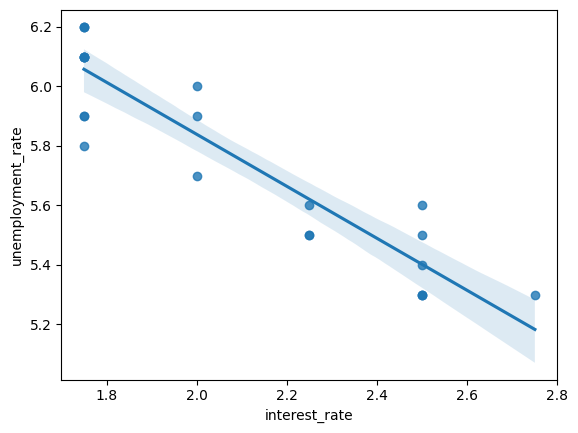

In [18]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<Axes: xlabel='interest_rate', ylabel='index_price'>

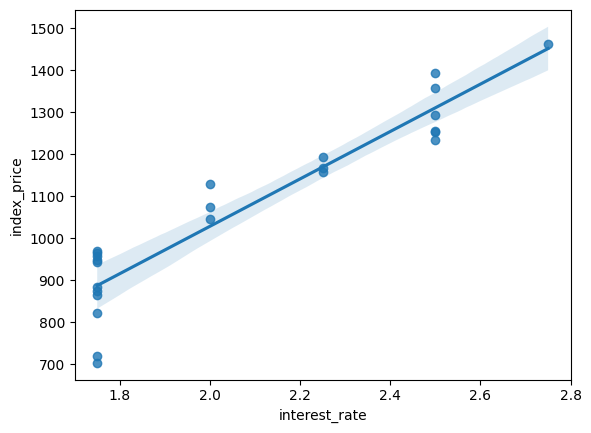

In [19]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: >

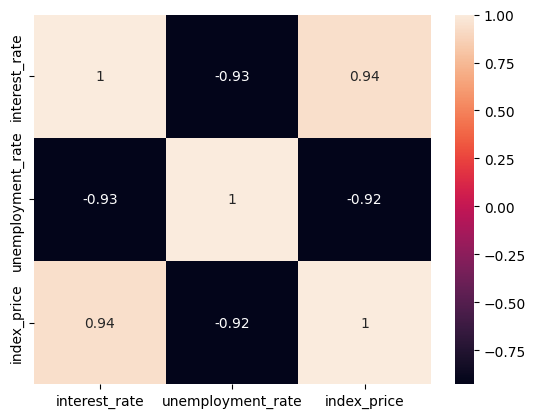

In [20]:
sns.heatmap(df_index.corr(), annot=True)

In [21]:
from sklearn.preprocessing import StandardScaler

standartScaller = StandardScaler()
X_train = standartScaller.fit_transform(X_train)
X_test = standartScaller.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linearRegressionModel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [24]:
print(np.mean(score))

-5649.115244350756


In [25]:
y_pred = linearRegressionModel.predict(X_test)

In [26]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

r_square = r2_score(y_test, y_pred)

adjusted_r_squared = 1 - (1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('r Square: ',r_square)
print('Adjusted r Square: ',adjusted_r_squared)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

r Square:  0.8278978091457145
Adjusted r Square:  0.8115071243024492
5793.762887712569
59.935781523235484


Assumptions

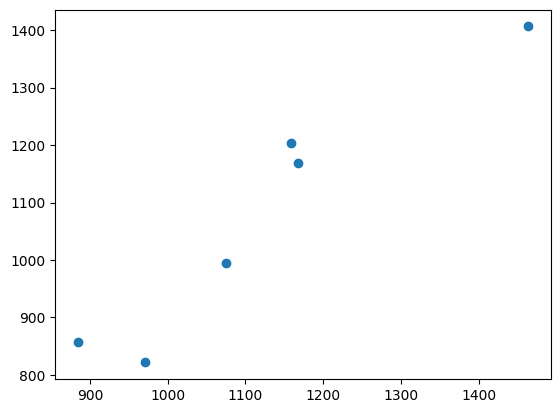

In [28]:
plt.scatter(y_test, y_pred)

In [29]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3964\2998397011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

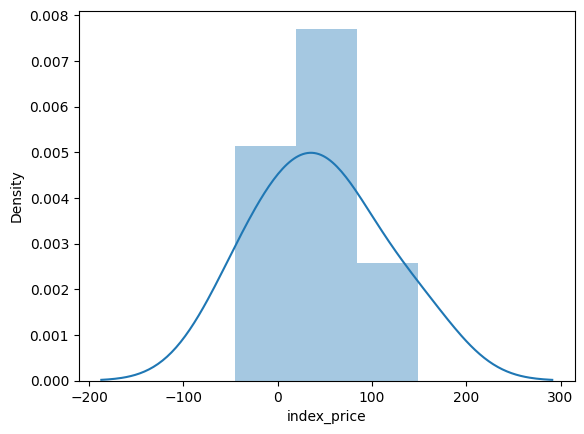

In [31]:
sns.distplot(residuals, kde=True)

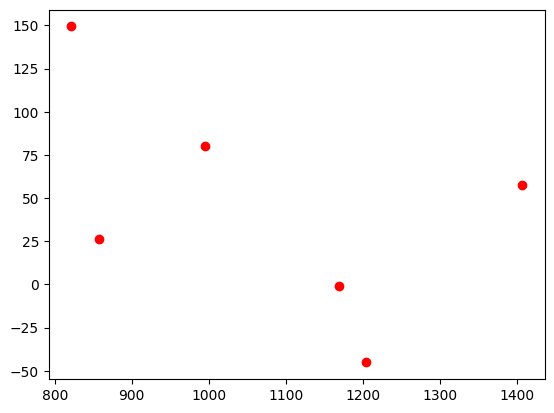

In [33]:
#scatter plot with respect to residuals and prediction
plt.scatter(y_pred, residuals, color='red', )

In [35]:
#OLS linear regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [36]:
model.summary()

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                       0.754
Time:                        14:21:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#linear regression model's coefficients
linearRegressionModel.coef_

array([  88.27275507, -116.25716066])